In [1]:
import tensorflow as tf

C:\Users\mwongkee\Anaconda3\envs\tf2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 44s 735us/sample - loss: 0.2985 - accuracy: 0.9123
Epoch 2/5
60000/60000 [==============================] - 37s 611us/sample - loss: 0.1430 - accuracy: 0.9580
Epoch 3/5
60000/60000 [==============================] - 37s 612us/sample - loss: 0.1077 - accuracy: 0.9674
Epoch 4/5
60000/60000 [==============================] - ETA: 0s - loss: 0.0867 - accuracy: 0.97 - 36s 596us/sample - loss: 0.0866 - accuracy: 0.9733
Epoch 5/5
60000/60000 [==============================] - 36s 606us/sample - loss: 0.0737 - accuracy: 0.9763
10000/1 - 3s - loss: 0.0390 - accuracy: 0.9773


[0.0763441649297718, 0.9773]

In [5]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [6]:
x_train[0], y_train[0]

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [7]:
import matplotlib
import matplotlib.pyplot as plt

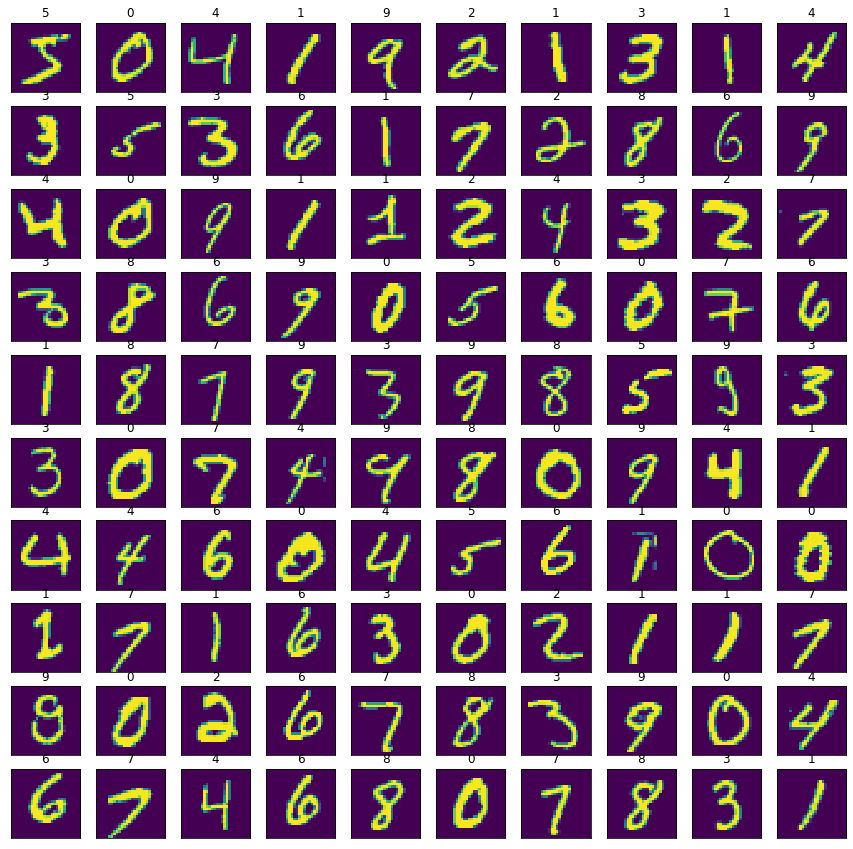

In [8]:
_, axes = plt.subplots(10, 10, figsize=(10 *1.5,10 *1.5))
axes = axes.flatten()
for i, ax in enumerate(axes):
    img = x_train[i]
    ax.imshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_title(y_train[i])

In [9]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [14]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [40]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        return x

# Create an instance of the model
model = MyModel()

In [44]:
L = 28
N = 5
def dense(x, W, b):
    return tf.matmul(x, W) + b

@tf.function
def single_dense(x, w0, b0):
    x = dense(x, w0, b0)
    return x

@tf.function
def single_softwax(x, w0, bo):
    tf.nn.softmax(dense(x, w0, b0))

class RawModel(Model):
    def __init__(self):
        super(RawModel, self).__init__()
        self.flatten = Flatten()
        init = tf.random_normal_initializer([L*L, N])
        self.w0 = tf.Variable(initial_value=init)
        self.b0 = tf.Variable(tf.random_normal_initializer([N, 1]), shape=tf.TensorShape([N, 1]))
        
    def call(self, x):
        x = self.flatten(x)
        x = single_softwax(x, self.w0, self.b0)
        return x
raw_model = RawModel()
        

TypeError: __call__() missing 1 required positional argument: 'shape'

In [51]:
A = tf.Variable([[1,2,3], [4,5,6], [7,8,9]], dtype=tf.float32)
import numpy as np
w0 = tf.Variable(np.random.random([L*L, N]), dtype=tf.float32)
 

In [32]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

In [33]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [34]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [35]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)
  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [36]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss: 0.4715800881385803, Accuracy: 87.80999755859375, Test Loss: 0.30830860137939453, Test Accuracy: 91.44999694824219
Epoch 2, Loss: 0.30353519320487976, Accuracy: 91.53500366210938, Test Loss: 0.28303763270378113, Test Accuracy: 91.93999481201172
Epoch 3, Loss: 0.2835179269313812, Accuracy: 92.03666687011719, Test Loss: 0.2729901373386383, Test Accuracy: 92.18999481201172
Epoch 4, Loss: 0.2733558714389801, Accuracy: 92.37833404541016, Test Loss: 0.2700302004814148, Test Accuracy: 92.40999603

In [79]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

(784,)

In [108]:
N = 5
L = 28